# Download the data

In [164]:
import pandas as pd
import numpy as np
from pathlib import Path
import urllib.request
import tarfile

In [165]:
tarfile_path = Path("Datasets/housing.tgz")

if not tarfile_path.is_file():
    Path("Datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url,tarfile_path)
    
with tarfile.open(tarfile_path) as tar_housing:
    tar_housing.extractall(path="Datasets/")


In [166]:
housing = pd.read_csv("Datasets/housing/housing.csv")

In [167]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [168]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [169]:
housing.drop_duplicates(inplace=True)
housing.shape

(20640, 10)

In [170]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Take a look at the Data Structure

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

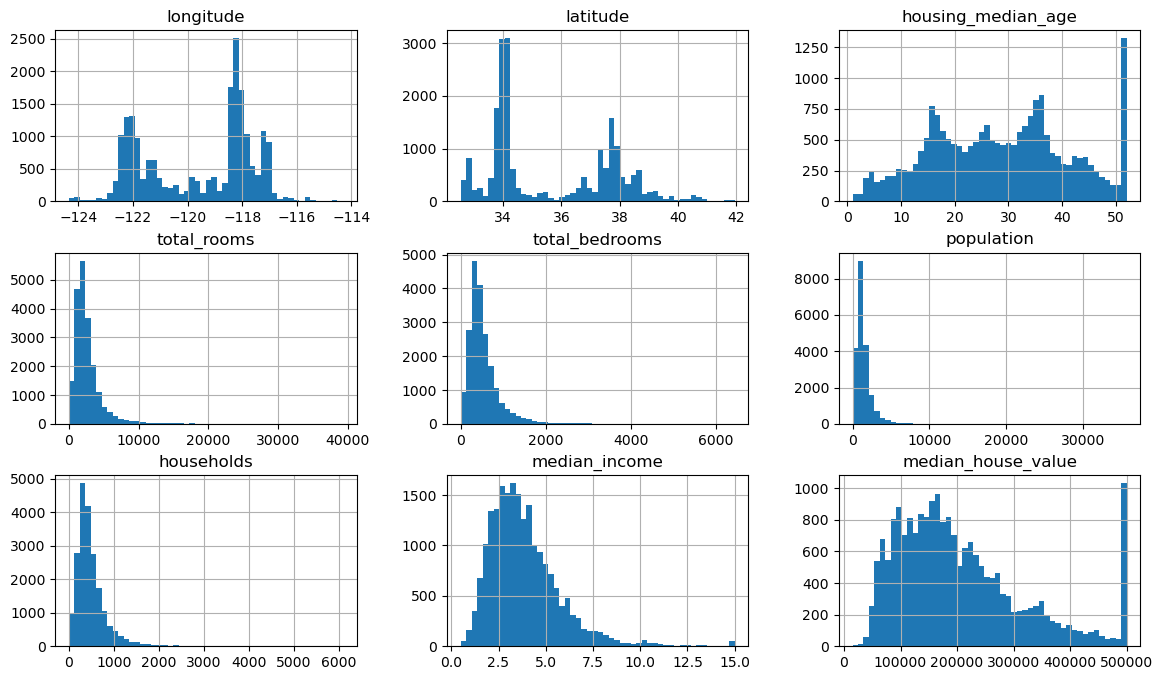

In [172]:
housing.hist(bins=50,figsize=(14,8))
plt.show()

# Create a test set 
It's a good time to set aside some data for testing. Otherwise more data exploration on the full data set can cause overfitting later.

In [173]:
from sklearn.model_selection import train_test_split


In [174]:
housing.corr()["median_house_value"].sort_values(ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9012\2270765898.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corr()["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

- Since "median_income" has very high correlation with house price, we do stratified splitting of the data based on "median_income". Since this feature is numerical, needed to be converted to categorical.

In [175]:
[np.percentile(housing.median_income,x) for x in [20,40,60,80] ]

[2.3523, 3.1406, 3.9669399999999997, 5.10972]

In [176]:

housing["income_cat"]  = pd.cut(housing.median_income,
                                bins=[0,2.35,3.14,4.0,5.11,np.inf],labels=[1,2,3,4,5])


In [177]:
strat_train, strat_test = train_test_split(housing,test_size=0.2,random_state=42,stratify=housing["income_cat"])

In [178]:
strat_train.income_cat.value_counts()

3    3441
2    3305
5    3301
1    3296
4    3169
Name: income_cat, dtype: int64

In [179]:
for x in (strat_test,strat_train):
    x.drop(["income_cat"],axis=1,inplace=True)

# Explore and visualize the data

- Since we are going to modify the train data for exploration, here we keep a copy of the original.

In [180]:
housing = strat_train.copy()


### Correlations

In [181]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687946
total_rooms           0.133471
housing_median_age    0.108667
households            0.063612
total_bedrooms        0.047437
population           -0.026057
longitude            -0.045501
latitude             -0.144481
Name: median_house_value, dtype: float64

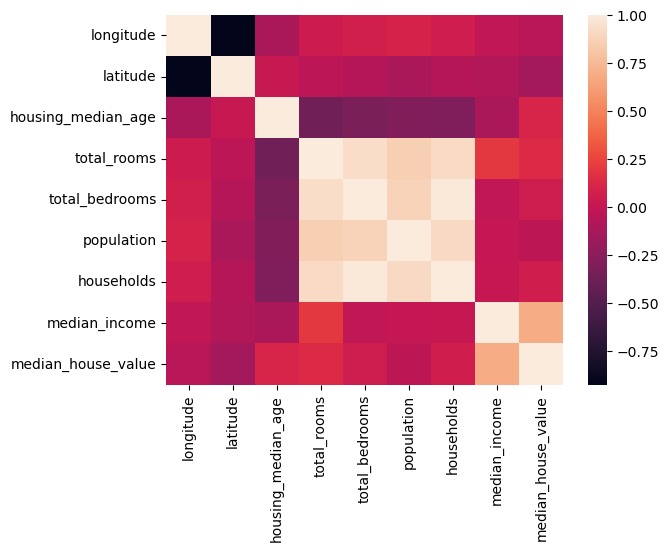

In [182]:
sns.heatmap(corr_matrix)
plt.show()

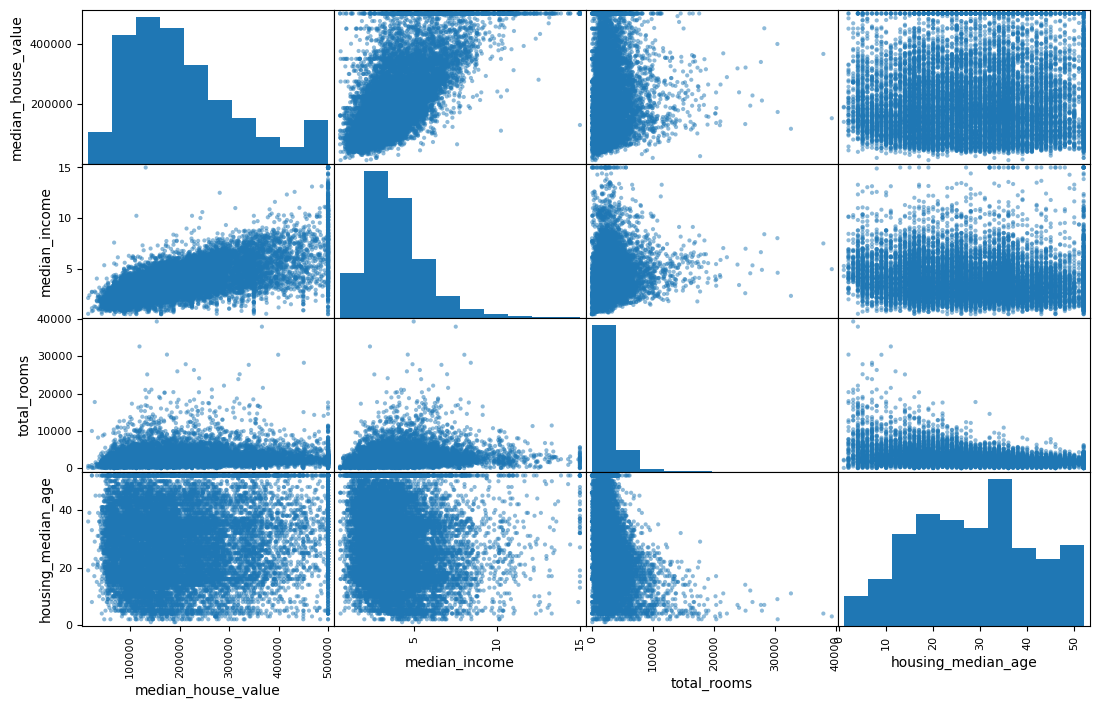

In [183]:
from pandas.plotting import scatter_matrix
features = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[features],figsize=(13,8))
plt.show()

- Some of the attributes has really promising correlation with the target variable, and thus can be useful for prediction. e.g. "median income". However, in the "median income" vs "median_house_value",  we can also observe some unwanted horizontal line, due to caping and some other reasons. We need to remove the corresponding districts later during data cleaning.    

## Experimenting with attribute combinations

- Here, we combine the existing features to get more meaning ful features that may have higher correlations with the target feature.

In [184]:
housing["bedrooms_per_house"] = housing.total_bedrooms/housing.households
housing["rooms_per_house"] = housing.total_rooms/housing.households
housing["person_per_house"] = housing.population/housing.households

housing["bedrooms_per_room"] = housing.total_bedrooms/housing.total_rooms
housing["person_per_room"] = housing.population/housing.total_rooms



In [185]:
housing.corr(numeric_only=True)["median_house_value"].abs().sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687946
bedrooms_per_room     0.254360
rooms_per_house       0.164530
latitude              0.144481
total_rooms           0.133471
housing_median_age    0.108667
person_per_room       0.081018
households            0.063612
bedrooms_per_house    0.047538
total_bedrooms        0.047437
longitude             0.045501
person_per_house      0.032767
population            0.026057
Name: median_house_value, dtype: float64

In [186]:
housing.drop(["person_per_house","bedrooms_per_house","population",
              "total_bedrooms","total_rooms"],axis=1,inplace=True)

In [187]:
housing.corr(numeric_only=True)["median_house_value"].abs().sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687946
bedrooms_per_room     0.254360
rooms_per_house       0.164530
latitude              0.144481
housing_median_age    0.108667
person_per_room       0.081018
households            0.063612
longitude             0.045501
Name: median_house_value, dtype: float64

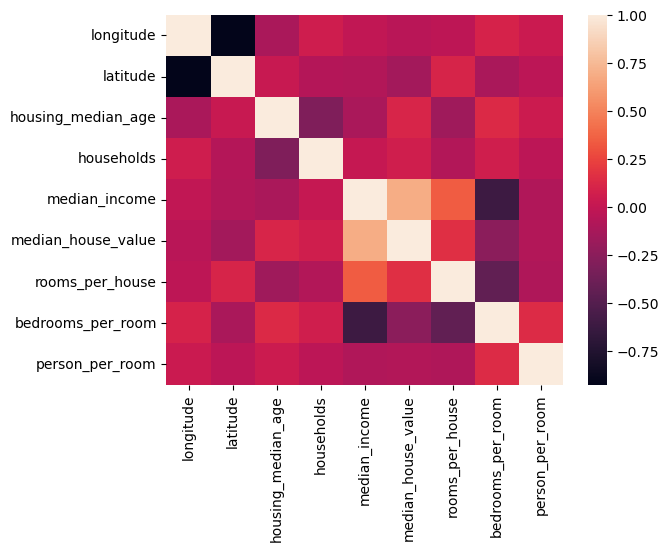

In [188]:
sns.heatmap(housing.corr(numeric_only=True))
plt.show()

The heatmap looks much better now. There is not much multicolinearity between the independent features.

So, we may use these feature set later to train our machine learning model.  

## Prepare the data for the machine learning model

- To clean the dataset, we now revert back to the strat_train data. We sepeate the independent features (predictors) from the target.  


In [189]:
housing = strat_train.drop(["median_house_value"],axis=1)
housing_labels = strat_train["median_house_value"].copy()

In [190]:
print(housing.shape,housing_labels.shape)

(16512, 9) (16512,)


**Clean the data**

- For the numerical features with null elements (if not very high percentage), we will replace the null values by the median using SimpleImputer from sklearn. Since SimpleImputer stores the median values for each fetures, it can be used later on the validation or test data as well.    

In [191]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [192]:
housing_num = housing.select_dtypes(include=np.number)
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [193]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

- The imputer returns a numpy array not a data frame. Thus, we can attach back the index and column values to produce DataFrame again.  

In [194]:
X = pd.DataFrame(imputer.transform(housing_num),index=housing_num.index, columns=housing_num.columns)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 10333 to 9771
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


**OneHotEncoding**
- Next, we deal with the only categorical feature we have.

In [195]:
housing_cat = housing.ocean_proximity
housing_cat.head(5)

10333    <1H OCEAN
17350       INLAND
12870     NEAR BAY
6739     <1H OCEAN
6621      NEAR BAY
Name: ocean_proximity, dtype: object

- Since we don't have too many categories, we can use OneHotEncoder to convert them into numbers.

In [196]:
from sklearn.preprocessing import OneHotEncoder
OHencoder = OneHotEncoder(handle_unknown="ignore",sparse_output=False)
df_dummy = housing[["ocean_proximity"]]

In [197]:
df_dummy.head()

,ocean_proximity
10333,<1H OCEAN
17350,INLAND
12870,NEAR BAY
6739,<1H OCEAN
6621,NEAR BAY


In [198]:
OHencoder.fit_transform(df_dummy)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [199]:
OHencoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [200]:
df_encoded = pd.DataFrame(OHencoder.fit_transform(df_dummy),
                          columns=OHencoder.get_feature_names_out(),
                          index = df_dummy.index)
df_dummy.join(df_encoded).head()

,ocean_proximity,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
10333,<1H OCEAN,1.0,0.0,0.0,0.0,0.0
17350,INLAND,0.0,1.0,0.0,0.0,0.0
12870,NEAR BAY,0.0,0.0,0.0,1.0,0.0
6739,<1H OCEAN,1.0,0.0,0.0,0.0,0.0
6621,NEAR BAY,0.0,0.0,0.0,1.0,0.0


## Feature transformation and Scalling

In [201]:
df_dummy = housing[["total_rooms","median_income"]]

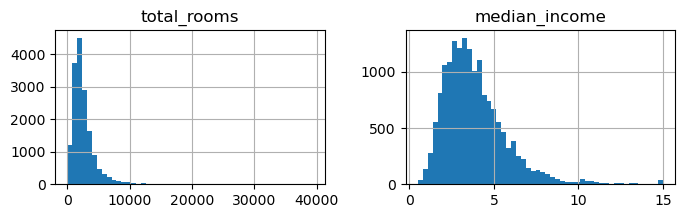

In [202]:
df_dummy.hist(bins=50,figsize=(8,2))
plt.show()

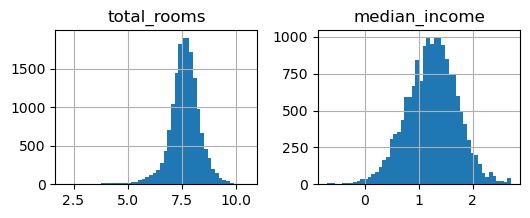

In [203]:
df_dummy = np.log(df_dummy)
df_dummy.hist(bins=50,figsize=(6,2))
plt.show()

- log transformation transforms the skewed distributions to almost normal distribution 

In [204]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

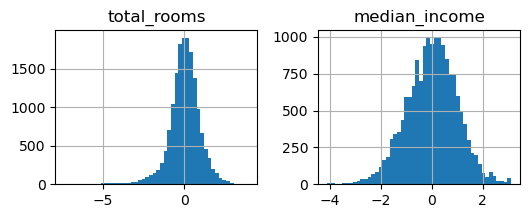

In [205]:
pd.DataFrame(scaler.fit_transform(df_dummy),
             columns=["total_rooms","median_income"] ).hist(bins=50,figsize=(6,2))
plt.show()

- Scalling of the log-transformed data makes them suitable for any machine learning model.

**Function transformer and pipeline** 
- We can perform the data transformation steps in a more compact manner by using pipelines. First, we create transformers for the functions like np.log() or any user defined function. Then we put all the Sklearn transformers and user defined transformers together in a pipeline.   

In [206]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [207]:
log_transform = FunctionTransformer(np.log)

In [211]:
cat_preprocessing = Pipeline([("log",log_transform),("scaling",StandardScaler())])

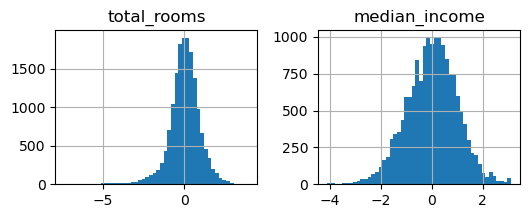

In [212]:
df_dummy = housing[["total_rooms","median_income"]]
df_dummy = cat_preprocessing.fit_transform(df_dummy)
pd.DataFrame(df_dummy,columns=["total_rooms","median_income"] ).hist(bins=50,figsize=(6,2))
plt.show()

### To deal with Latitude and Longitude

- The latitude and longitude features have multimodal distribution. One way to deal with such feature is by clustering and then finding the geographic similarities of each instance to the cluster centers. Thus, if we use n-clusters, we will get n new fetures inplace of latitude and longitude.

The following part of the code I am directly borrowing from the HOML book without a deep understanding. Roughly, we are constructing a transfromer "ClusterSimilarity" that can be used to fit and transform the Latitude and Longitude data into cluster similarites. This tranformer will store the cluster information from the training set, and thus can be used later to transform the test or validation dataset in a similar manner.   

In [213]:
from sklearn.base import BaseEstimator, TransformerMixin

In [214]:
class ClusterSimilarity(BasEstimator,TransformerMixin):
    
    

SyntaxError: expected ':' (2111625692.py, line 1)